# Deel 2 : Autoproductie 

# A : nodige modules

In [1]:
# standaard in python
import os 
import datetime
import sys
import random
import calendar
import gzip


In [2]:
# te installeren packages en modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from scipy.stats import weibull_min
from scipy.stats import skewnorm
from scipy.stats import norm
from scipy.stats import pareto
from scipy.stats import beta

from scipy import stats

from sklearn.linear_model import LinearRegression

from tqdm import tqdm

import seaborn as sns

In [3]:
# eigen packages modules
current_working_directory = os.getcwd()                                    
parent_working_directory = os.path.dirname(current_working_directory)      
scripts_directory = os.path.join(parent_working_directory, 'scripts')      
sys.path.append(scripts_directory)                                         
# sys.path.remove(scripts_directory)
# print(sys.path)

import comeinhandy as cih


# B : functies nog niet in modules

# C : opladen van de gegevens

In [4]:
autoproductie = pd.read_csv("../data/raw/autoproductie/cars.csv")

# D : een 1ste controle van de gegevens

In [5]:
autoproductie  # gebruik ook Data Wrangler

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,Iconic Coach,NaN,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,NaN,0.0,1.0,1.0,Apple Tree Acura,NaN,4.4,12.0,675.0,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,NaN,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762086,Volvo,S60 B5 Momentum,2022,22877.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,25-33,Bright Silver Metallic,Blond,0.0,1.0,0.0,Volvo Cars Danbury,4.2,4.2,2.0,250.0,34798.0
762087,Volvo,S60 T5,2012,72900.0,250.0HP 2.5L 5 Cylinder Engine Gasoline Fuel,A/T,Front-wheel Drive,Gasoline,NaN,Red,Beige,NaN,NaN,NaN,NaN,NaN,4.5,101.0,NaN,12500.0
762088,Volvo,S60 T5,2014,92000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,Front-wheel Drive,Gasoline,21-30,Ice White,Soft Beige,0.0,0.0,1.0,Dapper Car Sales,NaN,4.8,36.0,300.0,12299.0
762089,Volvo,S60 T5 Platinum,2013,132000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,All-wheel Drive,Gasoline,20-29,Ice White,Off Black,1.0,0.0,0.0,Legend Auto Sales Inc.,4.6,4.7,62.0,1000.0,8995.0


In [6]:
autoproductie.shape

(762091, 20)

In [7]:
autoproductie.columns

Index(['manufacturer', 'model', 'year', 'mileage', 'engine', 'transmission',
       'drivetrain', 'fuel_type', 'mpg', 'exterior_color', 'interior_color',
       'accidents_or_damage', 'one_owner', 'personal_use_only', 'seller_name',
       'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop',
       'price'],
      dtype='object')

In [8]:
autoproductie.index

RangeIndex(start=0, stop=762091, step=1)

In [9]:
autoproductie.dtypes

manufacturer            object
model                   object
year                     int64
mileage                float64
engine                  object
transmission            object
drivetrain              object
fuel_type               object
mpg                     object
exterior_color          object
interior_color          object
accidents_or_damage    float64
one_owner              float64
personal_use_only      float64
seller_name             object
seller_rating          float64
driver_rating          float64
driver_reviews_num     float64
price_drop             float64
price                  float64
dtype: object

In [10]:
autoproductie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762091 entries, 0 to 762090
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   manufacturer         762091 non-null  object 
 1   model                762091 non-null  object 
 2   year                 762091 non-null  int64  
 3   mileage              761585 non-null  float64
 4   engine               747041 non-null  object 
 5   transmission         752187 non-null  object 
 6   drivetrain           740529 non-null  object 
 7   fuel_type            739164 non-null  object 
 8   mpg                  620020 non-null  object 
 9   exterior_color       753232 non-null  object 
 10  interior_color       705116 non-null  object 
 11  accidents_or_damage  737879 non-null  float64
 12  one_owner            730608 non-null  float64
 13  personal_use_only    737239 non-null  float64
 14  seller_name          753498 non-null  object 
 15  seller_rating    

In [11]:
autoproductie.describe()

,year,mileage,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price
count,762091.000000,7.615850e+05,737879.000000,730608.000000,737239.000000,548118.000000,730459.000000,762091.000000,410112.000000,7.620910e+05
mean,2017.791398,5.578169e+04,0.228616,0.561969,0.657212,4.158568,4.623523,89.550900,1007.467068,3.648898e+04
std,5.110532,4.355788e+04,0.419942,0.496145,0.474642,0.805741,0.276902,115.082266,1375.122208,1.984183e+06
min,1915.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,100.000000,1.000000e+00
25%,2016.000000,2.328700e+04,0.000000,0.000000,0.000000,3.800000,4.500000,14.000000,380.000000,1.958300e+04
50%,2019.000000,4.559600e+04,0.000000,1.000000,1.000000,4.500000,4.700000,51.000000,642.000000,2.798900e+04
75%,2021.000000,7.836500e+04,0.000000,1.000000,1.000000,4.700000,4.800000,119.000000,1007.000000,3.948800e+04
max,2024.000000,1.119067e+06,1.000000,1.000000,1.000000,5.000000,5.000000,1025.000000,170995.000000,1.000000e+09


In [12]:
autoproductie.describe(include = "all") 

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
count,762091,762091,762091.000000,7.615850e+05,747041,752187,740529,739164,620020,753232,705116,737879.000000,730608.000000,737239.000000,753498,548118.000000,730459.000000,762091.000000,410112.000000,7.620910e+05
unique,30,12187,NaN,NaN,6903,1313,33,36,865,7681,4679,NaN,NaN,NaN,18254,NaN,NaN,NaN,NaN,NaN
top,Ford,Fusion SE,NaN,NaN,2.0L I4 16V GDI DOHC Turbo,6-Speed Automatic,Front-wheel Drive,Gasoline,19-26,Black,Black,NaN,NaN,NaN,Gateway Classic Cars,NaN,NaN,NaN,NaN,NaN
freq,79526,3172,NaN,NaN,75545,148597,241432,644644,16210,60250,286298,NaN,NaN,NaN,1638,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2017.791398,5.578169e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.228616,0.561969,0.657212,NaN,4.158568,4.623523,89.550900,1007.467068,3.648898e+04
std,NaN,NaN,5.110532,4.355788e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.419942,0.496145,0.474642,NaN,0.805741,0.276902,115.082266,1375.122208,1.984183e+06
min,NaN,NaN,1915.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,0.000000,100.000000,1.000000e+00
25%,NaN,NaN,2016.000000,2.328700e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,3.800000,4.500000,14.000000,380.000000,1.958300e+04
50%,NaN,NaN,2019.000000,4.559600e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,4.500000,4.700000,51.000000,642.000000,2.798900e+04
75%,NaN,NaN,2021.000000,7.836500e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,4.700000,4.800000,119.000000,1007.000000,3.948800e+04


# E : deelset met enkel Volvo's

In [13]:
cih.show_info_about_column(autoproductie, 'manufacturer')

----- None -- manufacturer -----------------------------------
df[col].describe(include='all') = count     762091
unique        30
top         Ford
freq       79526
Name: manufacturer, dtype: object 

----- None -- manufacturer -----------------------------------
df[col].nunique(dropna=True) = 30 
 
----- None -- manufacturer -----------------------------------
df[col].value_counts() = manufacturer
Ford             79526
Toyota           59535
Chevrolet        56043
Nissan           48529
Jeep             41665
Mercedes-Benz    40824
Honda            37612
BMW              37570
Kia              35063
GMC              29563
Dodge            25250
Subaru           24767
Volkswagen       24620
Hyundai          22203
Lexus            21301
RAM              19364
Audi             17863
Cadillac         17794
Mazda            15485
Buick            14624
Chrysler         12647
INFINITI         12289
Land Rover       12272
Porsche          11461
Lincoln          10608
Volvo            10029


In [14]:
df_volvos = autoproductie.loc[autoproductie['manufacturer'] == 'Volvo'].copy()
len(df_volvos)
df_volvos

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
752062,Volvo,XC90 Recharge Plug-In Hybrid T8 Inscription 6 ...,2022,10363.0,2.0L I4 16V GDI DOHC Hybrid,8-Speed Automatic,All-wheel Drive,Hybrid,NaN,Crystal White Metallic,Blond,0.0,0.0,1.0,Volvo Cars Arrowhead,2.9,NaN,0.0,4500.0,67998.0
752063,Volvo,XC90 Recharge Plug-In Hybrid T8 Inscription Ex...,2021,30404.0,2.0L I4 16V GDI DOHC Hybrid,8-Speed Automatic,All-wheel Drive,Hybrid,NaN,Gray,Charcoal,0.0,1.0,1.0,Weston Nissan Volvo Cars,4.8,3.8,14.0,8000.0,49995.0
752064,Volvo,XC90 Recharge Plug-In Hybrid T8 EAWD PHEV INSC...,2022,5968.0,2.0L I4 16V GDI DOHC Hybrid,8-Speed Automatic,All-wheel Drive,Hybrid,NaN,Crystal White Metallic,Charcoal,0.0,1.0,0.0,"Volvo Cars Plymouth, A Premier Company",4.7,NaN,0.0,200.0,62700.0
752065,Volvo,XC90 Recharge Plug-In Hybrid T8 Inscription Ex...,2022,8732.0,2.0L I4 16V GDI DOHC Hybrid,8-Speed Automatic,All-wheel Drive,Hybrid,NaN,Blue,NaN,0.0,1.0,1.0,Karp Kia,3.9,NaN,0.0,1500.0,59500.0
752066,Volvo,XC90 Recharge Plug-In Hybrid T8 Inscription Ex...,2022,9607.0,2.0L I4 16V GDI DOHC Turbo Hybrid,8-Speed Automatic,All-wheel Drive,Hybrid,NaN,Denim Blue Metallic,Amber,0.0,1.0,1.0,LaFontaine Volvo Cars of Farmington Hills,2.8,NaN,0.0,1893.0,72652.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762086,Volvo,S60 B5 Momentum,2022,22877.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,25-33,Bright Silver Metallic,Blond,0.0,1.0,0.0,Volvo Cars Danbury,4.2,4.2,2.0,250.0,34798.0
762087,Volvo,S60 T5,2012,72900.0,250.0HP 2.5L 5 Cylinder Engine Gasoline Fuel,A/T,Front-wheel Drive,Gasoline,NaN,Red,Beige,NaN,NaN,NaN,NaN,NaN,4.5,101.0,NaN,12500.0
762088,Volvo,S60 T5,2014,92000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,Front-wheel Drive,Gasoline,21-30,Ice White,Soft Beige,0.0,0.0,1.0,Dapper Car Sales,NaN,4.8,36.0,300.0,12299.0
762089,Volvo,S60 T5 Platinum,2013,132000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,All-wheel Drive,Gasoline,20-29,Ice White,Off Black,1.0,0.0,0.0,Legend Auto Sales Inc.,4.6,4.7,62.0,1000.0,8995.0


# F : vragen en antwoorden

## Vraag 1 : Wat voor soort data zijn `year`, `fuel_type` en `seller_rating`? 
Motiveer je antwoord.

### Antwoord
<span style="color:CadetBlue">  

- atribuut year bevat categorische ordinale data  

motivatie : het attibuut is niet numerisch vermits jaren niet opgeteld kunnen worden en is daarom eerder categorisch, ook omdat jaren niet steeds even groot zijn. Opgelet: met jaren kunnen tijdsafhankelijke berekeningen worden uitgevoerd, in dat kader kàn het numerisch zijn. Niet in het kader van deze vraag en oefening, naar mijn mening. Het is ordinaal omdat jaren een logische - in dit geval chronologische - volgorde hebben.

- atribuut fueltype bevat categorische niet ordinale data  

motivatie : na onderzoek is vast te stellen dat de gegevens in het atribuut fueltype van het nominale type zijn vermits er geen ranschikking of volgorde mogelijk. Er is wel wat overlap in betekenis van de gebruikte waardes, alsook vreemde data zoals 'automatic'

- atribuut seller_rating bevat categorische ordinale data

motivatie : ratings zijn niet numeriek in dit geval vermits ze niet opgeteld of numerisch benaderd kunnen worden. Dat heeft geen zin. Ze zijn hier categorisch (tussen waarden 1.0 en 5.0) en ordinaal omdat een rating van 5.0 een 'betere' ofte hogere waardering geeft 

</span>

### Onderzoek


#### 1.1. onderzoek atribuut 'year'

In [15]:
cih.show_info_about_column(autoproductie, 'year')

----- None -- year -----------------------------------
df[col].describe(include='all') = count    762091.000000
mean       2017.791398
std           5.110532
min        1915.000000
25%        2016.000000
50%        2019.000000
75%        2021.000000
max        2024.000000
Name: year, dtype: float64 

----- None -- year -----------------------------------
df[col].nunique(dropna=True) = 100 
 
----- None -- year -----------------------------------
df[col].value_counts() = year
2020    133589
2021    108894
2019    105934
2022     80714
2018     62878
         ...  
1934         1
1935         1
1919         1
1917         1
1942         1
Name: count, Length: 100, dtype: int64 
 
----- end of query --------------------------------------------------


#### 1.2. onderzoek atribuut 'fueltype'

In [16]:
cih.show_info_about_column(autoproductie, 'fuel_type')

----- None -- fuel_type -----------------------------------
df[col].describe(include='all') = count       739164
unique          36
top       Gasoline
freq        644644
Name: fuel_type, dtype: object 

----- None -- fuel_type -----------------------------------
df[col].nunique(dropna=True) = 36 
 
----- None -- fuel_type -----------------------------------
df[col].value_counts() = fuel_type
Gasoline                         644644
Hybrid                            29141
Diesel                            27967
E85 Flex Fuel                     18772
Electric                          16192
B                                  1442
Flexible Fuel                       493
Plug-In Hybrid                      118
Gasoline Fuel                        80
Gasoline/Mild Electric Hybrid        70
Regular Unleaded                     56
Premium Unleaded                     49
G                                    45
Compressed Natural Gas               29
Unspecified                          26
Diese

#### 1.3. onderzoek atribuut 'seller_rating'

In [17]:
cih.show_info_about_column(autoproductie, 'seller_rating')

----- None -- seller_rating -----------------------------------
df[col].describe(include='all') = count    548118.000000
mean          4.158568
std           0.805741
min           1.000000
25%           3.800000
50%           4.500000
75%           4.700000
max           5.000000
Name: seller_rating, dtype: float64 

----- None -- seller_rating -----------------------------------
df[col].nunique(dropna=True) = 41 
 
----- None -- seller_rating -----------------------------------
df[col].value_counts() = seller_rating
4.8    64396
4.7    56343
4.9    51092
4.6    49169
4.5    40523
4.4    30633
4.3    26375
4.2    21922
4.1    18092
5.0    16939
4.0    16469
3.9    16280
3.8    12180
3.6    11438
3.7    10962
3.3    10235
3.4     9589
3.5     9476
3.1     7641
3.2     6471
3.0     6274
2.8     6047
2.6     5132
2.9     4959
2.7     4761
2.4     4324
2.5     4260
1.8     3900
2.2     3769
2.3     2944
1.9     2934
2.1     2919
1.7     1912
2.0     1613
1.6     1477
1.5     1360
1.3     

## Vraag 2 : Ik vraag me af hoe een gewoonlijke (mbt prijs) $2^e$ hands Volvo eruit ziet. 
Kan je deze zoeken en tonen?

### Antwoord

<span style="color:CadetBlue">  

En wat betekent '.. een gewoonlijke (mbt prijs) 2de hands volvo er uit zien' ?? Vierkantig ? Rood ? Ik heb geen idee wat hier gevraagd wordt ..

</span>

### Onderzoek

In [18]:

cih.show_info_about_column(df_volvos, 'price')
print(df_volvos['price'].mean())
print(df_volvos['price'].median())
print(df_volvos['price'].mode())


----- None -- price -----------------------------------
df[col].describe(include='all') = count    10029.000000
mean     35799.978263
std      13951.807670
min        695.000000
25%      28187.000000
50%      36673.000000
75%      44700.000000
max      81400.000000
Name: price, dtype: float64 

----- None -- price -----------------------------------
df[col].nunique(dropna=True) = 4842 
 
----- None -- price -----------------------------------
df[col].value_counts() = price
39995.0    39
42995.0    36
34995.0    34
9995.0     33
33998.0    32
           ..
62000.0     1
53788.0     1
67555.0     1
33166.0     1
12299.0     1
Name: count, Length: 4842, dtype: int64 
 
----- end of query --------------------------------------------------
35799.97826303719
36673.0
0    39995.0
Name: price, dtype: float64


## Vraag 3 : We kunnen de verdeling van de prijs van $2^e$ hands Volvo's voorstellen met een histogram:
 - Waar zou je verwachten dat het gemiddelde +/- ligt voor deze verdeling?
 - Waar zou je verwachten dat de mediaan +/- ligt?

Teken dit histogram met `.hist` en gebruik `.axvline` om de mediaan en het gemiddelde toe te voegen aan de plot. Komt dit overeen met je verwachting?

 - Kan je de emprisiche cummulatieve distributie functie tekenen voor de verdeling die overeenkomt met dit histogram (zie ook `scipy.stats.ecdf`).

### Antwoord

<span style="color:CadetBlue">  

- Bij een normale verdeling van de prijzen verwacht ik dat het gemiddelde en de mediaan vermoedelijk in dat deel van een histogram liggen (zie afbeelding verder in onderdeel Onderzoek) waar het hoogste/grootste blok van de historgram grafiek zich bevindt. Vraag is dan ook wat de beste aantal bins is om 'brede' maar niet 'te brede' historgramblokken te hebben, zodat gemiddelde en mediaan er altijd in vallen onder een normale verdeling. Ik vroeg daarom aan Chatgpt naar de beste granulariteit aka aantal bins in een historgram : antwoord : tussen de 5 en de 20. Ik nam 10.

- De tekeningen vind je verder het onderdeel onderzoek

</span>

### Onderzoek

In [19]:
gemiddelde = df_volvos['price'].mean()
mediaan = df_volvos['price'].median()
modus = df_volvos['price'].mode().iloc[0]

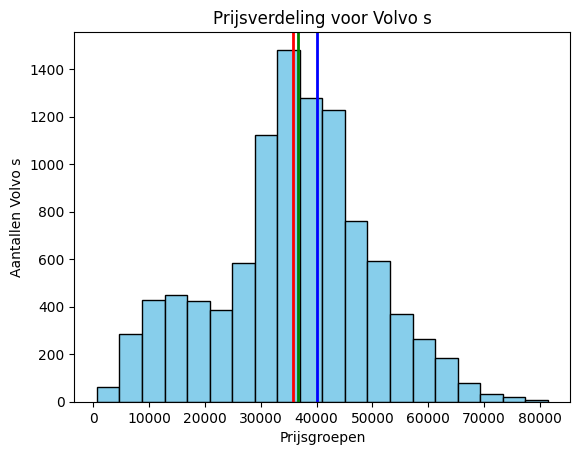

In [20]:
plt.hist(df_volvos['price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Prijsgroepen')
plt.ylabel('Aantallen Volvo ''s')
plt.title('Prijsverdeling voor Volvo ''s')
          
plt.axvline(gemiddelde, linewidth=2,color='r')
plt.axvline(mediaan, linewidth=2,color='g')
plt.axvline(modus, linewidth=2,color='b')
          
plt.show()

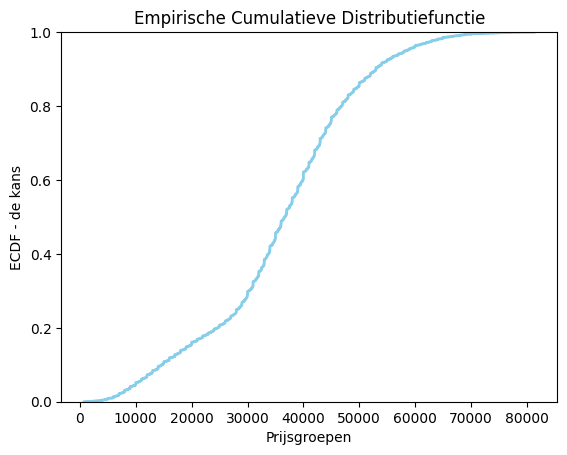

In [21]:
sns.ecdfplot(data=df_volvos, x='price', color='skyblue', linewidth=2)

plt.xlabel('Prijsgroepen')
plt.ylabel('ECDF - de kans')
plt.title('Empirische Cumulatieve Distributiefunctie')

plt.show()

#### Chatgpt : wat is doorgaans het beste aantal bins voor een historgram ?

antwoord Copilot

Het bepalen van het optimale aantal bins voor een histogram is een veelvoorkomende vraag in gegevensvisualisatie. Er zijn verschillende methoden om het juiste aantal bins te kiezen, en de keuze hangt af van de aard van de gegevens en het doel van de analyse.

Hier zijn enkele benaderingen:

Sturges’ Regel:

Deze regel berekent het aantal bins op basis van het aantal observaties (n).
Het aantal bins is ongeveer gelijk aan 1 + log2(n).
Deze methode werkt goed voor normaal verdeelde gegevens en grote steekproeven.

Freedman-Diaconis Regel:
Deze regel houdt rekening met de spreiding van de gegevens (interkwartielafstand, IQR).
De bin-breedte wordt ingesteld op h = 2 × IQR × n^(-1/3).
Het aantal bins is dan (max - min) / h.

Automatische methoden:
Veel visualisatiebibliotheken (zoals seaborn en matplotlib) hebben automatische binning-algoritmen.
Deze algoritmen proberen een redelijk aantal bins te kiezen op basis van de gegevensverdeling.

Gebruik je domeinkennis:
Overweeg de aard van je gegevens en het doel van de visualisatie.
Kies een aantal bins dat betekenisvol is voor je specifieke context.

Experimenteer:
Probeer verschillende aantallen bins en bekijk hoe de histogrammen eruitzien.
Pas het aantal bins aan totdat je een grafiek krijgt die de gegevens goed weergeeft zonder te veel detail of te veel aggregatie.
Er is geen universeel “beste” aantal bins, maar het is belangrijk om te experimenteren en te kiezen op basis van de specifieke situatie. Vaak is een aantal tussen 5 en 20 voldoende, maar dit kan variëren afhankelijk van je gegevens.

Ik hoop dat dit helpt! Als je nog meer vragen hebt, laat het me weten! 😊

#### ChatGPT : Wat is het verschil tussen een normale en een uniforme verdeling ?

antwoord Copilot

De normale verdeling en de uniforme verdeling zijn twee verschillende kansverdelingen die in de statistiek worden gebruikt. Laten we eens kijken naar de belangrijkste verschillen tussen beide:

Normale Verdeling (Gaussische Verdeling):

De normale verdeling is de meest gebruikte kansverdeling in de statistiek.

Eigenschappen:

Symmetrisch: De verdeling is symmetrisch rond het gemiddelde.

Klokvormig: De grafiek van de normale verdeling heeft een karakteristieke klokvorm.

Continue Verdeling: De normale verdeling is een continue verdeling.

Meestal Gebruikt voor Modellering: Het wordt gebruikt om verschijnselen te modelleren die de neiging hebben de vorm van een “belcurve” te volgen.
Voorbeelden: Geboortegewicht van pasgeborenen, IQ-scores, lengte van volwassenen.

Uniforme Verdeling:

De uniforme verdeling is een kansverdeling waarbij elke waarde tussen een interval van a tot en met b dezelfde kans heeft om te voorkomen.

Eigenschappen:

Symmetrisch: De verdeling is rechthoekig van vorm.

Continue of Discrete Verdeling: Er zijn zowel continue als discrete uniforme verdelingen.

Even Waarschijnlijkheid: Elke mogelijke uitkomst heeft dezelfde kans om te verschijnen.

Voorbeelden: Gooien van een dobbelsteen (elk getal heeft dezelfde kans), willekeurige selectie van een nummer tussen 1 en 100.

Wanneer Gebruik Je Ze?

Normale Verdeling: Gebruik de normale verdeling om verschijnselen te modelleren die de neiging hebben de vorm van een “belcurve” te volgen.

Uniforme Verdeling: Gebruik de uniforme verdeling om scenario’s te modelleren waarin elke potentiële uitkomst even waarschijnlijk is.

In het kort: de normale verdeling is klokvormig en wordt vaak gebruikt voor continue gegevens, terwijl de uniforme verdeling rechthoekig van vorm is en wordt gebruikt voor even waarschijnlijke uitkomsten.

!Normale vs. Uniforme Verdeling

## Vraag 4 : Ik wil nu de verschillende fuel types vergelijken hoeveel deze kosten. 
Hiervoor maak ik volgende afbeelding met meerdere histogrammen hoe kunnen we deze beter maken? Welke alternatieven zijn er nog?

### Antwoord

<span style="color:CadetBlue">  

Door Seaborn histplot te gebruiken of eventueel de ECDF grafiek te gebruiken.

</span>

### Onderzoek

In [22]:
selection_gasoline = df_volvos.loc[df_volvos['fuel_type'] == 'Gasoline', ['fuel_type', 'price']]
selection_electric = df_volvos.loc[df_volvos['fuel_type'] == 'Electric', ['fuel_type', 'price']]
selection_hybrid = df_volvos.loc[df_volvos['fuel_type'] == 'Hybrid', ['fuel_type', 'price']]


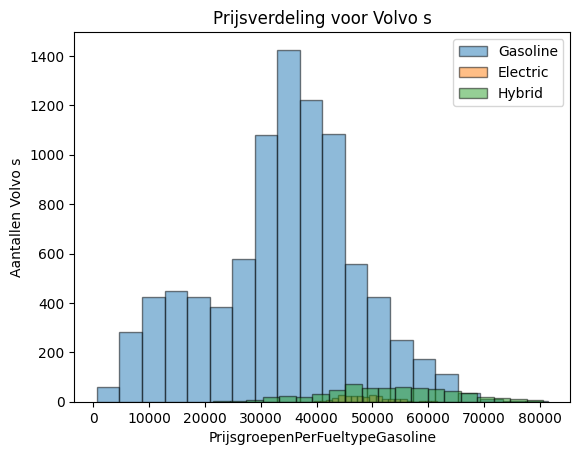

In [23]:

plt.hist(selection_gasoline['price'], bins=20, alpha=0.5, label='Gasoline', edgecolor='black')
plt.hist(selection_electric['price'], bins=20, alpha=0.5, label='Electric', edgecolor='black')
plt.hist(selection_hybrid['price'], bins=20, alpha=0.5, label='Hybrid', edgecolor='black')

plt.xlabel('PrijsgroepenPerFueltypeGasoline')
plt.ylabel('Aantallen Volvo ''s')
plt.title('Prijsverdeling voor Volvo ''s')

plt.legend()
                  
plt.show()

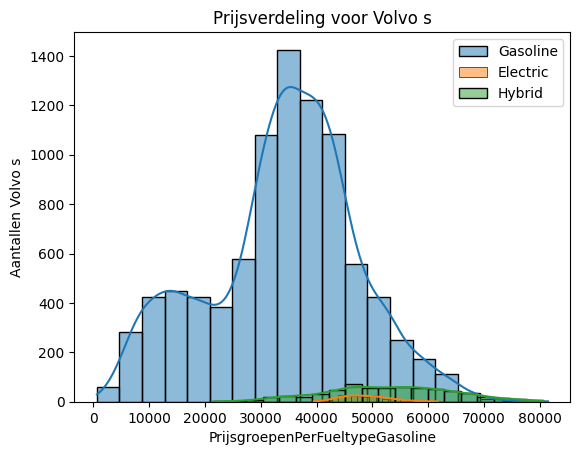

In [24]:
aant_bins = 20
sns.histplot(data=selection_gasoline['price'], bins=aant_bins, kde =True, label='Gasoline')
sns.histplot(data=selection_electric['price'], bins=aant_bins, kde =True, label='Electric')
sns.histplot(data=selection_hybrid['price'], bins=aant_bins, kde =True, label='Hybrid')

plt.xlabel('PrijsgroepenPerFueltypeGasoline')
plt.ylabel('Aantallen Volvo ''s')
plt.title('Prijsverdeling voor Volvo ''s')

plt.legend()
          

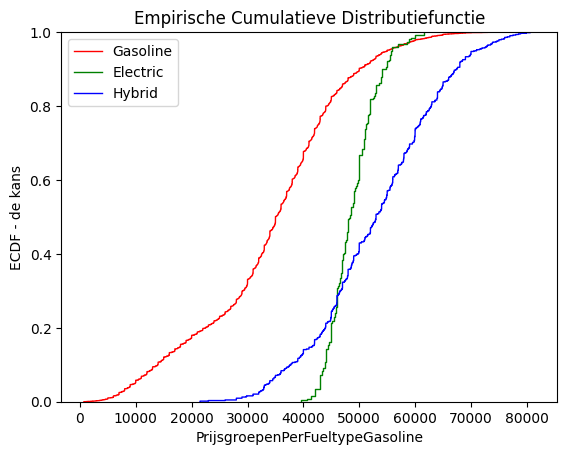

In [25]:
sns.ecdfplot(data=selection_gasoline, x='price', color='r', label='Gasoline', linewidth=1)
sns.ecdfplot(data=selection_electric, x='price', color='g', label='Electric', linewidth=1)
sns.ecdfplot(data=selection_hybrid, x='price', color='b', label='Hybrid', linewidth=1)

plt.xlabel('PrijsgroepenPerFueltypeGasoline')
plt.ylabel('ECDF - de kans')
plt.title('Empirische Cumulatieve Distributiefunctie')
plt.legend()
          
plt.show()

## Vraag 5 : Gegeven volgende boxplots van de prijs van elektrische & benzine wagens, zijn volgende uitspraken waar/onwaar/niet te besluiten & leg uit:

 - De spreiding op de prijs van elektrische wagens is groter dan die van benzinewagens.

 - Een wagen die meer dan 50 000 euro kost heeft een grotere kans om elektrisch te zijn dan benzine.

 - Een elektrische wagen heeft een grotere kans om meer dan 50 000 euro te kosten dan een benzine wagen.

### Antwoord

<span style="color:CadetBlue">  

NOG IN TE VULLEN
</span>

### Onderzoek

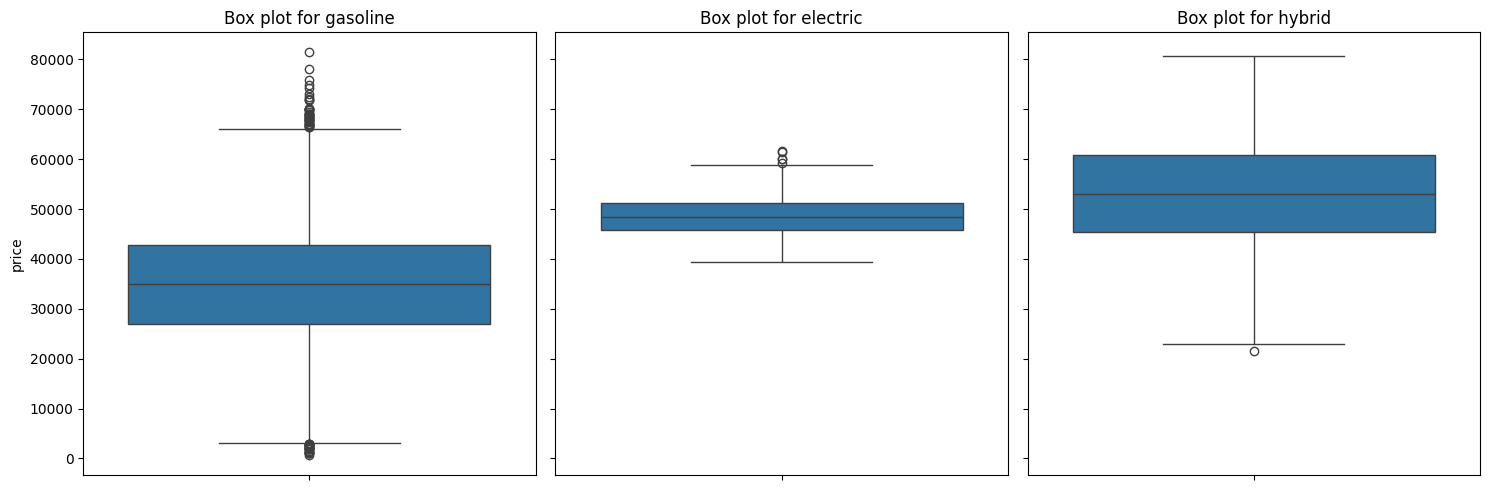

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.boxplot(data=selection_gasoline['price'], ax=axes[0])
sns.boxplot(data=selection_electric['price'], ax=axes[1])
sns.boxplot(data=selection_hybrid['price'], ax=axes[2])

axes[0].set_title('Box plot for gasoline')
axes[1].set_title('Box plot for electric')
axes[2].set_title('Box plot for hybrid')

# plt.hist(selection_gasoline['price'], bins=10, alpha=0.5, label='Gasoline', edgecolor='black')
# plt.hist(selection_electric['price'], bins=10, alpha=0.5, label='Electric', edgecolor='black')
# plt.hist(selection_hybrid['price'], bins=10, alpha=0.5, label='Hybrid', edgecolor='black')

# plt.xlabel('Fuel type')
# plt.ylabel('price')
# plt.title('box plots')

# plt.legend()
plt.tight_layout()                  
plt.show()

## Vraag 6 : Maak een visualizatie om het verband tussen mileage & price te tonen?

### Antwoord

<span style="color:CadetBlue">  

Ik heb de volgende grafiektypes geprobeerd/gebruikt :

scatterplot: eerst alle gegevens, dan de outliers weggewerkt en 98% percentiel gebruikt  
--> Resultaat : hogere mileage geeft lagere prijs, de scatter is breed en funnelt naargelang de mileage stijgt

heatmap (alle numerische kolommen)  
--> Ik vermoed dat enkel getallen groter dan 0,50 zin hebben  
--> Op die manier vermoed ik dat er enkel een verband is tusseen year, mileage en price  
--> Of single_ownership en aantal reviews zin hebben < .5 weet ik niet.

regplot (mileage en price)  
--> zelfde resultaat als scatterplot, met een mooi rood lijntje

pairplot (mileage, price en year)  
--> Zet de (numeriek zinnige) attributen tegenover elkaar af  
--> De attributen tegenover zichzelf tonen de piek (modus vermoed ik)  
--> De attributen t.o.v. de niet zichzelf attributen geven meer info :  price/year en mileage/year 

</span>

### Onderzoek

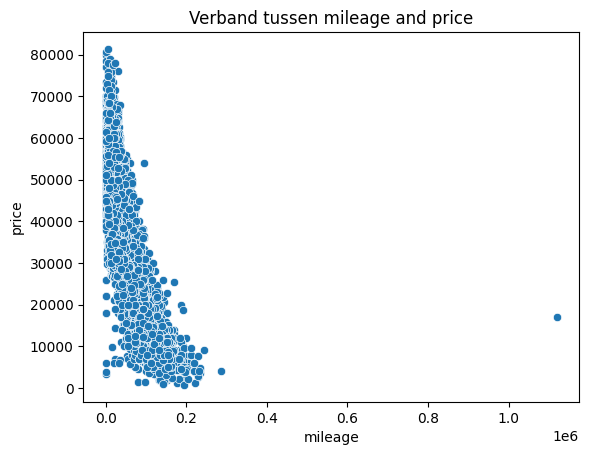

In [27]:
# SNS scatterplot mét outliers

sns.scatterplot(x='mileage', y='price', data=df_volvos)
plt.xlabel('mileage')
plt.ylabel('price')
plt.title('Verband tussen mileage and price')
plt.show()

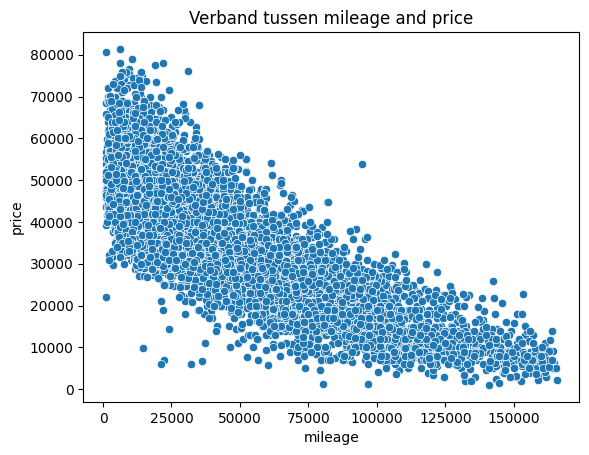

In [28]:
# SNS scatterplot minus de 1% outliers
# misschien beter outliers identificeren adhv ouderdom ?  Meer functioneel en minder statistisch ?

p5 = df_volvos['mileage'].quantile(0.01)
p95 = df_volvos['mileage'].quantile(0.99)

# Remove outliers that fall outside the 5th and 95th percentiles
df_volvos_no_outliers = df_volvos[(df_volvos['mileage'] >= p5) & (df_volvos['mileage'] <= p95)]

sns.scatterplot(x='mileage', y='price', data=df_volvos_no_outliers)
plt.xlabel('mileage')
plt.ylabel('price')
plt.title('Verband tussen mileage and price')
plt.show()

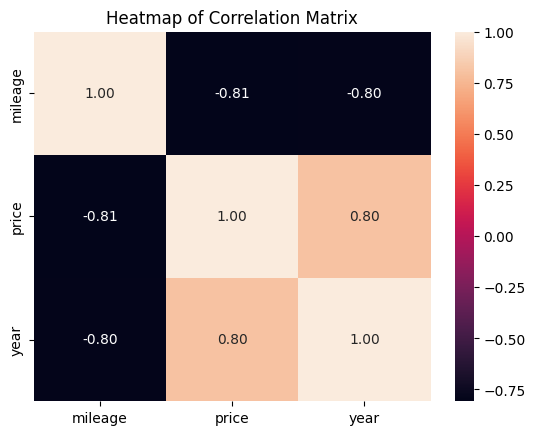

In [29]:
# SNS heatmap, werkt niet al te best blijkbaar, geen idee waarom

# correlation_matrix = df_volvos_no_outliers[['mileage','price']].corr()
correlation_matrix = df_volvos_no_outliers[['mileage','price', 'year']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

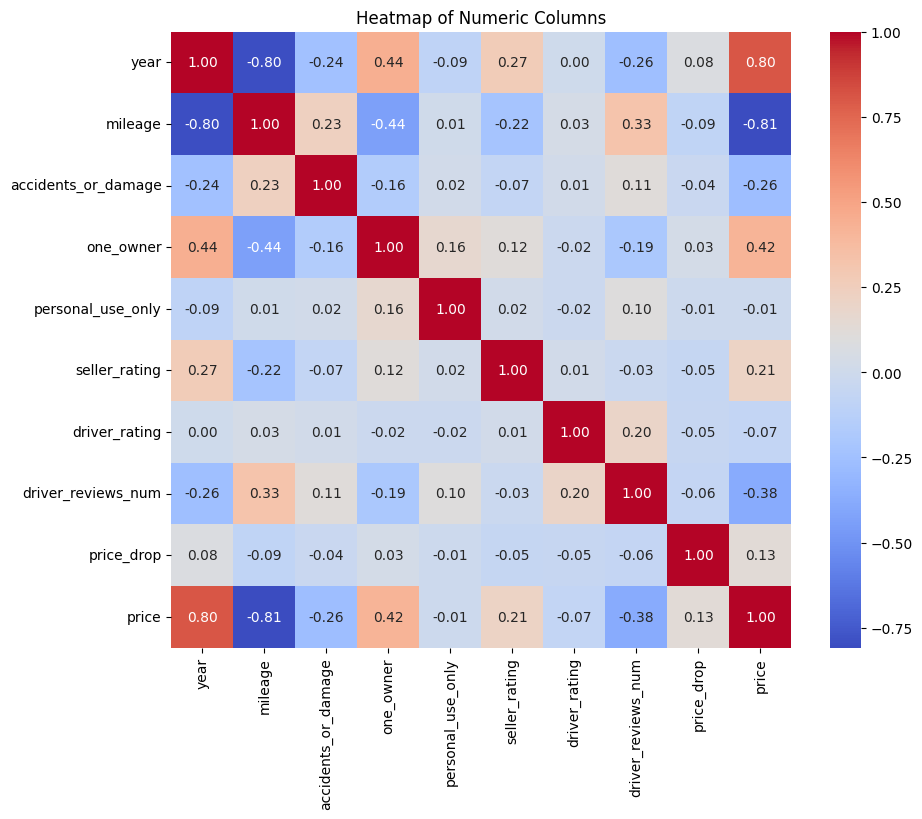

In [30]:
# SNS heatmap, met een selectie enkel op dtype numerics (bron chatgpt natuurlijk)
#  opmerking, de andere numerisch kolommen werden niet gecleaned 
# Data xrangler geeft toch wel grotere percentages missing data, hoe beïnvloedt dit de grafiek ?

df_volvos_no_outliers_numeric_only = df_volvos_no_outliers.select_dtypes(include='number')

plt.figure(figsize=(10, 8))  # Optional: Adjust the size of the figure
sns.heatmap(df_volvos_no_outliers_numeric_only.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Numeric Columns')
plt.show()

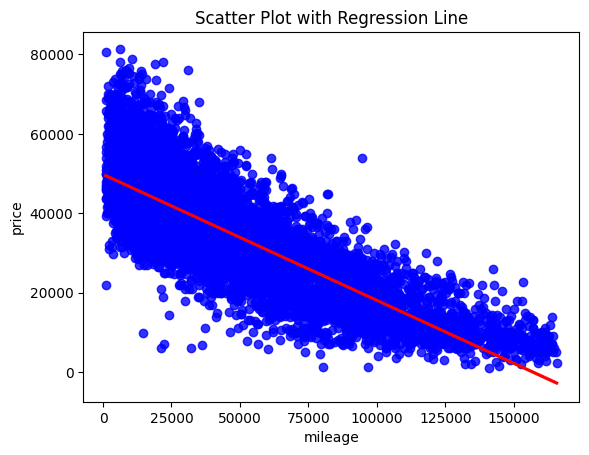

In [31]:
# SNS regplot, ik vermoed regressie plot

sns.regplot(x='mileage', y='price', data=df_volvos_no_outliers,
                scatter_kws={"color": "blue"},
                line_kws={"color": "red"})
plt.title('Scatter Plot with Regression Line')
plt.show()

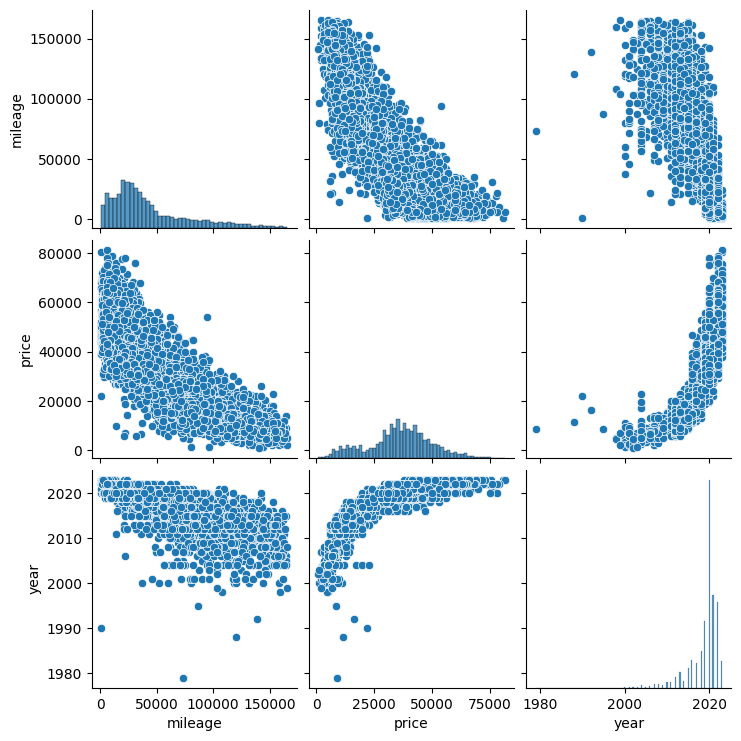

In [32]:
# SNS pairplot, geen idee hoe te gebruiken 

sns.pairplot(df_volvos_no_outliers[['mileage','price', 'year']])

# sns.pairplot(df_volvos_no_outliers_numeric_only)

# sns.pairplot(df_volvos_no_outliers[['mileage','price', 'driver_reviews_num']])

# sns.pairplot(df_volvos_no_outliers[['mileage','price', 'fuel_type', 'year','exterior_color']])
#  waarom werkt fuel_type, exterior_color, drivetrain niet .. enkel getallen, ordinaal (lager/hoger) ?? 

# sns.pairplot(df_volvos_no_outliers)
# grote afbeelding, zijn dit dan alle mogelijke paren ?

plt.show()

## Vraag 7 : Volgens deze data is de gemiddelde prijs van $2^e$ hands elektrische Volvo’s 48 000 euro; als we veronderstellen dat onze dataset representatief is voor alle 2de hands volvo’s, hoe kan je de accuraatheid van deze schatting nagaan?

### Antwoord

<span style="color:CadetBlue">  

Bereken de p-value (hypothesis test), van CHATGPT geplukt.  
p-value = 1,29604.. e-257 (belachelijk klein blijkbaar). Dit zu dan wijzen op hoge accuraatheid. 

</span>

### Onderzoek

In [33]:
print("Mean df_volvos", df_volvos['price'].mean())
print("Median, df_volvos", df_volvos['price'].median())
print("Variance, df_volvos", df_volvos['price'].var())
print("------------------------")
print("Mean, selection_electric", selection_electric['price'].mean())
print("Median, selection_electric", selection_electric['price'].median())
print("Variance, selection_electric", selection_electric['price'].var())
print("------------------------")
t_stat, p_value = stats.ttest_ind(selection_electric['price'], df_volvos['price'], equal_var=False)
print(t_stat, p_value)
print("------------------------")

Mean df_volvos 35799.97826303719
Median, df_volvos 36673.0
Variance, df_volvos 194652937.2550121
------------------------
Mean, selection_electric 48788.391304347824
Median, selection_electric 48363.0
Variance, selection_electric 17322483.239130437
------------------------
43.81448256811035 1.2960498723543706e-157
------------------------


To check the correctness of a mean value calculated from DataFrame 1, knowing that it is a subset of DataFrame 2 (which is representative of the population for the column in question), you can follow these steps:

1. **Calculate the Mean in DataFrame 1**:
   Compute the mean of the relevant column in DataFrame 1.

    ```python
    mean_df1 = dataframe1['column_name'].mean()
    ```

2. **Calculate the Mean in DataFrame 2**:
   Compute the mean of the same column in DataFrame 2.

    ```python
    mean_df2 = dataframe2['column_name'].mean()
    ```

3. **Compare the Means**:
   Compare the mean from DataFrame 1 with the mean from DataFrame 2.

    - If the mean from DataFrame 1 is close to the mean from DataFrame 2, and given that DataFrame 2 is representative, it suggests that the mean from DataFrame 1 is likely correct.
    - If there is a significant difference, it may indicate that DataFrame 1 might not be a representative subset for the calculation of the mean, or there might be an error in the calculation.

4. **Statistical Testing**:
   If you want to statistically test whether the mean from DataFrame 1 is significantly different from the mean in DataFrame 2, you can perform a hypothesis test (e.g., t-test) if the assumptions for the test are met.

    ```python
    from scipy import stats

    # Assuming the data is normally distributed and independent
    t_stat, p_value = stats.ttest_ind(dataframe1['column_name'], dataframe2['column_name'], equal_var=False)
    ```

    - A high p-value (typically > 0.05) suggests that there is no significant difference between the means, supporting the correctness of the mean from DataFrame 1.
    - A low p-value indicates a significant difference between the means.

5. **Check Sample Size**:
   Ensure that DataFrame 1 has a sufficient sample size to provide a reliable estimate of the mean. A very small sample size may not be representative, even if it is a subset of a representative DataFrame.

6. **Consider the Variance**:
   Look at the variance in both DataFrames. If DataFrame 1 has a variance that is significantly different from DataFrame 2, it might affect the representativeness of the mean.

By following these steps, you can assess the correctness of the mean value from DataFrame 1 in relation to the representative DataFrame 2. 📊